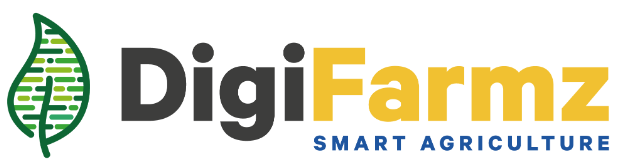

**[Pessoa Estagiária] - Cientista de Dados**

# Desafio 1

**Enunciado**

Dado um vetor de inteiros, retorne a quantidade de elementos repetidos. Não confunda quantidade de elementos com quantidade de repetições.

**Exemplo**

*   Entrada: 1,2,3,1,1,3
*   Saída: 2

**Explicação**

Os números 1 e 3 estão repetidos.

**Sua solução**

In [13]:
# TODO

import random

random.seed(10)

lista = []

for i in range(25):
    n = random.randint(1,30)
    lista.append(n)

print('A lista gerada com 25 numeros entre 1 e 30 é: ',lista) 


repeticao = dict()
elem_repetidos=0

for i in lista:
    repeticao[i] = lista.count(i)

for j in repeticao.values():
  if j>=2:
     elem_repetidos +=1

print('\n0 numero de elementos repetidos é: ', elem_repetidos)


A lista gerada com 25 numeros entre 1 e 30 é:  [19, 2, 14, 16, 19, 1, 7, 15, 27, 16, 27, 9, 21, 26, 6, 2, 17, 16, 11, 3, 8, 24, 12, 2, 14]

0 numero de elementos repetidos é:  5


# Desafio 2

## Bibliotecas e Funções

In [31]:
import  pandas             as  pd 
import  seaborn            as  sns 
import  numpy              as  np 
import  matplotlib.pyplot  as  plt 

# Seleção de Features
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Divisão do dataset entre treino e teste
from sklearn.model_selection   import train_test_split

# Regressão Linear
from sklearn.linear_model      import LinearRegression

# Métricas
from sklearn.metrics           import mean_absolute_error, mean_squared_error

In [32]:
# algumas configurações

%matplotlib inline

plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [18, 8]
plt.rcParams['font.size'] = 22

pd.set_option('display.float_format', lambda x: '%.2f' % x)

sns.set()

In [23]:
# funções para auxiliar

def mean_percentage_error( y, ypre):
    return np.mean((y - ypre) / y)
    
def mean_absolute_percentage_error(y, ypre):
    return np.mean(np.abs((y - ypre) / y))

def ml_error(model_name, y, ypre):
    MAE  = mean_absolute_error(y, ypre)
    MAPE = mean_absolute_percentage_error(y, ypre)
    RMSE = np.sqrt(mean_squared_error(y, ypre))
    
    return pd.DataFrame({'Modelo ': model_name,
                         'MAE' : MAE,
                         'MAPE': MAPE,
                         'RMSE': RMSE},index=[0])

## Leitura dos Dados

In [24]:
# Carregar conjunto de dados de preços de imóveis em Boston da coleção 'sklearn.datasets' 

from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [27]:

import pandas as pd
# Altere os nomes das colunas de números de índice para 'feature_names' 
df = pd.DataFrame(boston.data, columns=boston.feature_names)

#Adicione uma coluna chamada 'PRICE' de boston.target 
df['PRICE'] = boston.target

In [28]:
# Olhadinha
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Seleção de Features

**TODO**

In [33]:
# Construir modelo com um único recurso, selecionando "o recurso mais importante"
import numpy as np
x=np.array(df.iloc[:,:-1])
y = np.array(df['PRICE'])

selecao=SelectKBest(score_func=f_regression,k=1)

In [35]:
# Avaliar qual a feature mais relevante nos dados.

selecao.fit_transform(x,y)
selecao.scores_
#TODO

array([ 89.48611476,  75.2576423 , 153.95488314,  15.97151242,
       112.59148028, 471.84673988,  83.47745922,  33.57957033,
        85.91427767, 141.76135658, 175.10554288,  63.05422911,
       601.61787111])

In [36]:
# Selecionar y e X (considerar somente a feature mais importante)
X_reduzido=selecao.transform(x)
print(X_reduzido)
#TODO

[[ 4.98]
 [ 9.14]
 [ 4.03]
 [ 2.94]
 [ 5.33]
 [ 5.21]
 [12.43]
 [19.15]
 [29.93]
 [17.1 ]
 [20.45]
 [13.27]
 [15.71]
 [ 8.26]
 [10.26]
 [ 8.47]
 [ 6.58]
 [14.67]
 [11.69]
 [11.28]
 [21.02]
 [13.83]
 [18.72]
 [19.88]
 [16.3 ]
 [16.51]
 [14.81]
 [17.28]
 [12.8 ]
 [11.98]
 [22.6 ]
 [13.04]
 [27.71]
 [18.35]
 [20.34]
 [ 9.68]
 [11.41]
 [ 8.77]
 [10.13]
 [ 4.32]
 [ 1.98]
 [ 4.84]
 [ 5.81]
 [ 7.44]
 [ 9.55]
 [10.21]
 [14.15]
 [18.8 ]
 [30.81]
 [16.2 ]
 [13.45]
 [ 9.43]
 [ 5.28]
 [ 8.43]
 [14.8 ]
 [ 4.81]
 [ 5.77]
 [ 3.95]
 [ 6.86]
 [ 9.22]
 [13.15]
 [14.44]
 [ 6.73]
 [ 9.5 ]
 [ 8.05]
 [ 4.67]
 [10.24]
 [ 8.1 ]
 [13.09]
 [ 8.79]
 [ 6.72]
 [ 9.88]
 [ 5.52]
 [ 7.54]
 [ 6.78]
 [ 8.94]
 [11.97]
 [10.27]
 [12.34]
 [ 9.1 ]
 [ 5.29]
 [ 7.22]
 [ 6.72]
 [ 7.51]
 [ 9.62]
 [ 6.53]
 [12.86]
 [ 8.44]
 [ 5.5 ]
 [ 5.7 ]
 [ 8.81]
 [ 8.2 ]
 [ 8.16]
 [ 6.21]
 [10.59]
 [ 6.65]
 [11.34]
 [ 4.21]
 [ 3.57]
 [ 6.19]
 [ 9.42]
 [ 7.67]
 [10.63]
 [13.44]
 [12.33]
 [16.47]
 [18.66]
 [14.09]
 [12.27]
 [15.55]
 [13.  ]
 

In [37]:
# Dividir os dados em treino e teste, considerando o tamanho de teste 30% e random seed 101
X_treino, X_teste, y_treino, y_teste = train_test_split(X_reduzido, y, test_size=0.3, random_state=101)
#TODO

## Engenharia de Features

Qual feature a mais você criaria neste dataset para utilizar no modelo? Explique sua resposta:

**TODO**

## Modelo

**TODO**

In [38]:
# Realizar o treinamento utilizando regressão linear

regressao=LinearRegression()

# Criamos o modelo e realizamos o treinamento

regressao.fit(X_treino,y_treino)

# Mostrar Modelo
print('Coefciente angular da regressão: ',regressao.coef_,'\nCoeficiente linear da regressao: ',regressao.intercept_)

# Realizar a inferência

y_prev=regressao.predict(X_treino)

Coefciente angular da regressão:  [-0.94525483] 
Coeficiente linear da regressao:  34.32424077509831


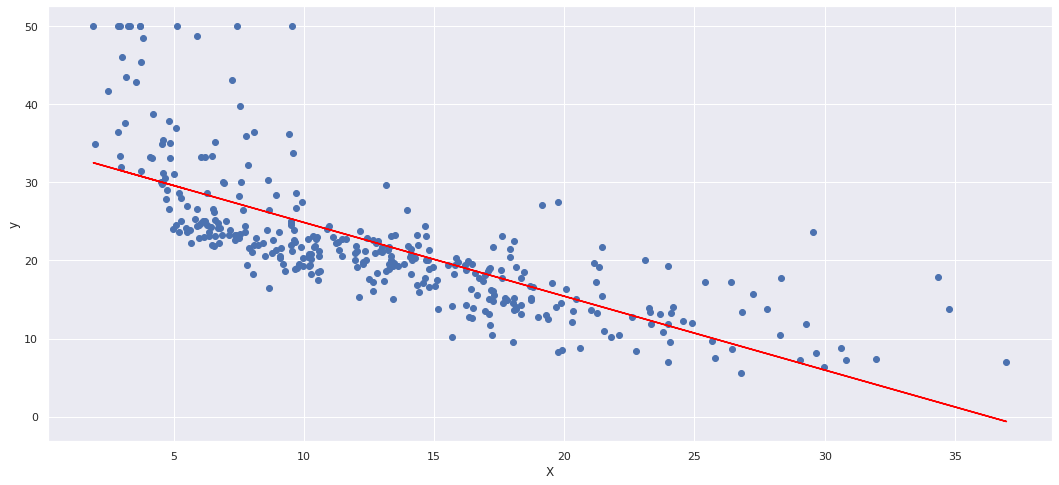

,Modelo,MAE,MAPE,RMSE
0,LSTAT,4.16,0.20,5.85


In [39]:
# Visualização

# Dados de Treino
plt.scatter(X_treino, y_treino)

# Reta que representa o modelo
plt.plot(X_treino, regressao.coef_ * X_treino + regressao.intercept_, color = 'red')

plt.xlabel('X')
plt.ylabel('y')

plt.grid(True)

plt.show()

modelos = ml_error("LSTAT", y_treino, y_prev)

modelos

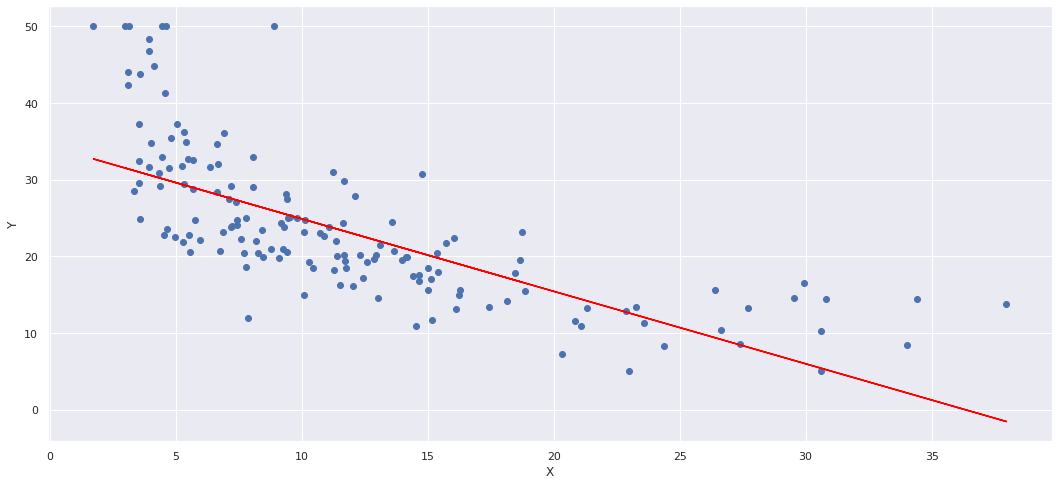

,Modelo,MAE,MAPE,RMSE
0,LSTAT,5.17,0.24,6.96


In [40]:
y_prev_teste=regressao.predict(X_teste)

plt.scatter(X_teste, y_teste)

plt.plot(X_teste, regressao.coef_ * X_teste + regressao.intercept_, color = 'red')

plt.xlabel('X')
plt.ylabel('Y')

plt.grid(True)

plt.show()

modelos_teste = ml_error('LSTAT', y_teste, y_prev_teste)

modelos_teste

In [41]:
metricas=pd.concat([modelos, modelos_teste], axis = 0, ignore_index=True)
metricas.index=['Treino', 'Teste']

display(metricas)

,Modelo,MAE,MAPE,RMSE
Treino,LSTAT,4.16,0.20,5.85
Teste,LSTAT,5.17,0.24,6.96


## Avaliação do Modelo

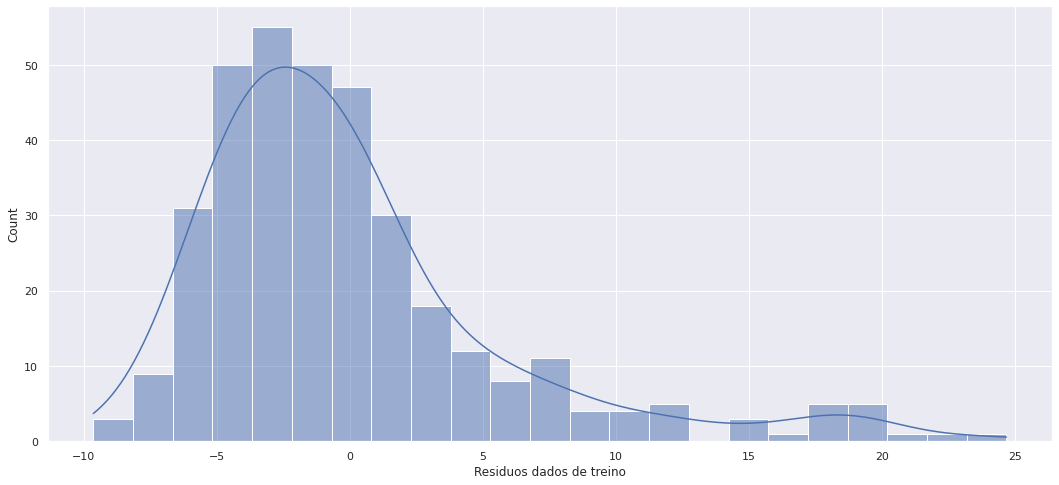

In [42]:
# Análise de Resíduos
# Testamos o modelo com os dados de treino e comparamos
#  a saída do modelo com a saída rotulada dos dados de treino

y_treino_modelo = regressao.predict(X_treino)
residuos = y_treino - y_treino_modelo

df_residuos = pd.Series(residuos, name = 'Residuos dados de treino')
sns.histplot(data = df_residuos, kde = True)

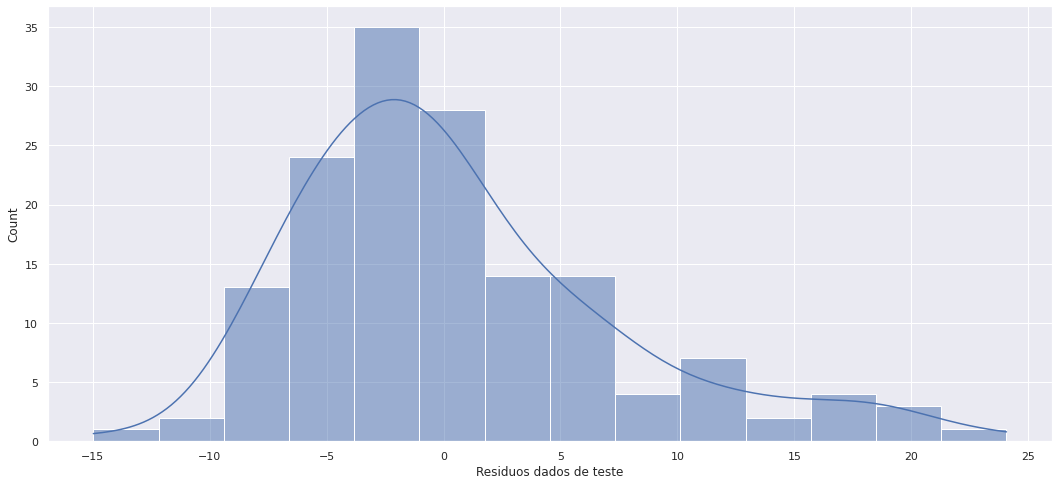

In [43]:
#Teste

y_teste_modelo = regressao.predict(X_teste)
residuos_teste = y_teste - y_teste_modelo
df_residuos_teste = pd.Series(residuos_teste, name = 'Residuos dados de teste')
sns.histplot(data = df_residuos_teste, kde = True)



---

## Explique o que pode ser observado com os resultados obtidos.

---





**Variavel com maior correlação com o preço medio das casas na regiao é LSTAT**


# Desafio 3


---

## O gráfico mostra três modelos com polinomios de 1, 2 e 16 grau. Qual obteve o melhor resultado e porque?

---



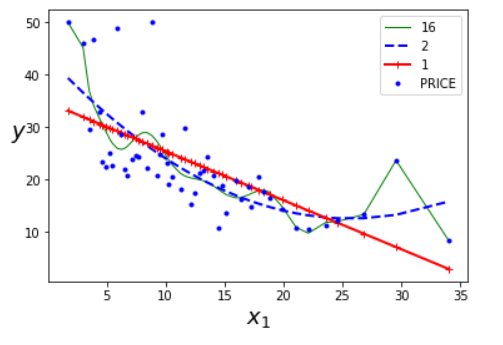

**Melhor resposta é o modelo 2. Pois capta apenas a tendencia de uma distribuição dos dados, sem 'tentar' se ajustar a distruibuicao dos dados de treino. Desse jeito, o modelo 2 vai performar melhor, ja que capturou a tendencia de distribuição**